# [문제-1] 네이버 날씨 정보 스크랩핑 하기 (25점)

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = 'https://search.naver.com/search.naver?query=날씨'
res = requests.get(URL)
soup = BeautifulSoup(res.text, 'lxml')

location = soup.find('div', attrs = {'class':'title_area _area_panel'}).find('h2', attrs = {'class':'title'}).text

weather = soup.find('span', attrs = {'class':'weather before_slash'}).text
temp = soup.find('div', attrs = {'class':'temperature_text'}).text[6:]

lowest = soup.find('span', attrs = {'class':'lowest'}).text[4:]
highest = soup.find('span', attrs = {'class':'highest'}).text[4:]

dust = soup.find('span', attrs = {'class':'txt'}).text

import datetime

# [문제-2] 네이버에서 bts이미지를 검색한 후 나온 결과 중 10개의 이미지를 저장하기 (20점)

In [13]:
import os
import time
import requests
from bs4 import BeautifulSoup

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver import Chrome, ChromeOptions
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait

driver = Chrome(service=Service(ChromeDriverManager().install()), options=ChromeOptions())
driver.get('https://www.naver.com')
ele = driver.find_element(By.ID, 'query')
ele.send_keys('bts')
ele.send_keys(Keys.ENTER)

wait = WebDriverWait(driver, 10)
driver.find_element(By.LINK_TEXT, '이미지').click()
time.sleep(4)

bts_imgs = driver.find_elements(By.CSS_SELECTOR, '#main_pack > section.sc_new.sp_nimage._fe_image_viewer_prepend_target > div.api_subject_bx._fe_image_tab_list_root.ani_fadein > div > div > div.image_tile._fe_image_tab_grid > div > div > div > div')

bts_imgs[0].click()

img_dir = './bts_img/'
if not os.path.exists(img_dir):
    os.mkdir(img_dir)
    print('폴더 생성')
else:
    print('폴더가 존재함')

cnt = 0
for i, img in enumerate(bts_imgs):
    img.click()
    original_img = driver.find_element(By.CLASS_NAME, '_fe_image_viewer_image_fallback_target').get_attribute('src')
    if not original_img.startswith('http'): continue

    cnt += 1
    img_contents = requests.get(original_img)
    with open(img_dir+f'bts_{cnt:02d}.jpg', 'wb') as f:
        print(original_img)
        f.write(img_contents.content)

    if cnt >= 10: break

print('BTS 사진 저장 완료')

폴더가 존재함
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2F0e%2F76%2F04%2F0e76048d4120fbb5e9d2f12c1fdfc5c6.jpg&type=sc960_832
https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzA3MTNfMTcg%2FMDAxNjg5MTgxNzY1OTYy.L12zL7MbdLWv5UdwfDOduFvyPHk6uOH6baOMVQLDUewg.KD-dkM8F5s5j-64ADDcJCABK32h4QRQTuRFA3fbYuaog.JPEG.awoocom7%2FBTS_%2527We%2527_BTS1-4.jpg&type=sc960_832
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fdimg.donga.com%2Fwps%2FNEWS%2FIMAGE%2F2022%2F12%2F20%2F117077571.1.jpg&type=sc960_832
https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F020%2F2023%2F02%2F11%2F0003479072_001_20230211030147673.jpg&type=sc960_832
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2F8e%2F82%2Fcd%2F8e82cd8b649d0bbf52dd9cfeb68dd415.jpg&type=sc960_832
https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMzA3MTdfMTg0%2FMDAxNjg5NTkxNDA3NDkw.4TIRRCUlNql5zvNlxmlYnbyF6zIRA5Xi84IjApa6

# [문제-3] 멜론 사이트 최신곡 검색 (25점)

In [34]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.melon.com/new/index.htm'

headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'}

res = requests.get(URL, headers = headers)
soup = BeautifulSoup(res.text, 'lxml')

song_list = soup.select('#frm > div > table > tbody > tr') 
# print(len(song_list)) #유저를 넣으니까 len이 됨 대박 ;;

print(f"{'곡명':30s}{'가수':30s}{'앨범':30s}")
for rank, song in enumerate(song_list, 1):
    song_info = song.find_all('div', {'class':'wrap_song_info'})

    title = song_info[0].find('div',attrs={'class':'ellipsis rank01'}).find('a').text #해당 태그의 밑에 있는 a태그가 제목을 가지고 있음
    singer = song_info[0].find('div',attrs={'class':'ellipsis rank02'}).find('a').text
    album = song_info[1].find('div',attrs={'class':'ellipsis rank03'}).find('a').text
    print(f'{rank:02d}{title:30s}{singer:30s}{album:30s}')
    if rank >=10: break

곡명                            가수                            앨범                            
01혹시 세상에 혼자 남겨진 것 같다면           우디 (Woody)                    When You Alone                
02일기                            김나영                           눈물의 여왕 OST Part.7             
03헤어지면 생각나는 노래                  브로맨스 (VROMANCE)               헤어지면 생각나는 노래                  
04안아줄래                          임세준                           rest                          
05부디                            전건호                           부디                            
06내 사랑은 여기 다 썼으니                숙희                            내 사랑은 여기 다 썼으니                
07단                             노을                            단                             
08Forever with you              더 라스트 배너맨(THE LAST BANNER MAN)Forever with you              
09아는 여자                         유성은                           아는 여자                         
10Kiss                          이준형                           Kiss Alone

# [문제-4] 대문자 시작 단어 찾기 (5점)

In [24]:
import re
s = '''Edit the Expression & Text to see matches. Roll over matches or the expression
for details. PCRE & JavaScript flavors of RegEx are supported. Validate your
expression with Tests mode.'''

m = re.findall('[A-Z]\w+', s)
print(m)

['Edit', 'Expression', 'Text', 'Roll', 'PCRE', 'JavaScript', 'RegEx', 'Validate', 'Tests']


# 5번 이메일 주소 추출하기 (5점)

In [1]:
import re

s = '''Ryan has sent an invoice email to john.d@yahoo.com by using his email id
ryan.arjun@gmail.com and he also shared a copy to his boss
rosy.gray@amazon.co.uk on the cc part.'''

exp = re.compile('\w+[.]\w+[@]\w+[.]\w+[.]?\w{2,3}')
result = exp.findall(s)
print(result)

['john.d@yahoo.com', 'ryan.arjun@gmail.com', 'rosy.gray@amazon.co.uk']


# [문제-6] 다음의 데이터를 이용하여 각 요구사항에 맞는 시각화 그래프를 작성하세요. (20점)

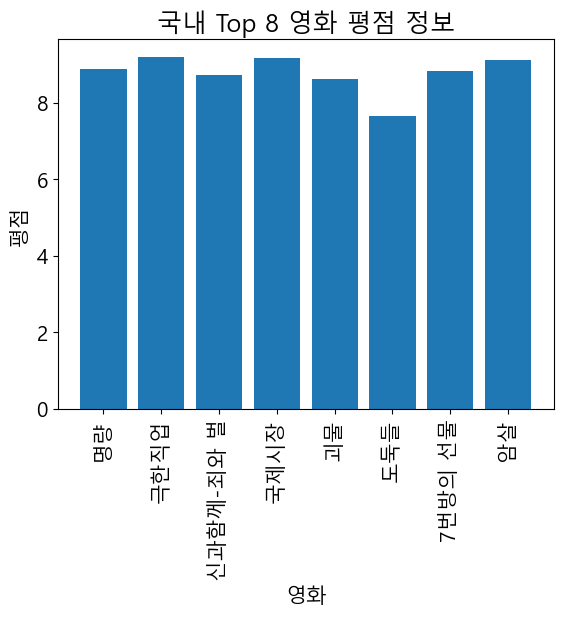

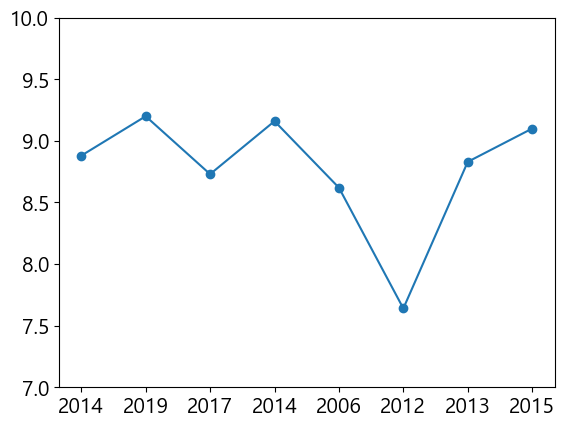

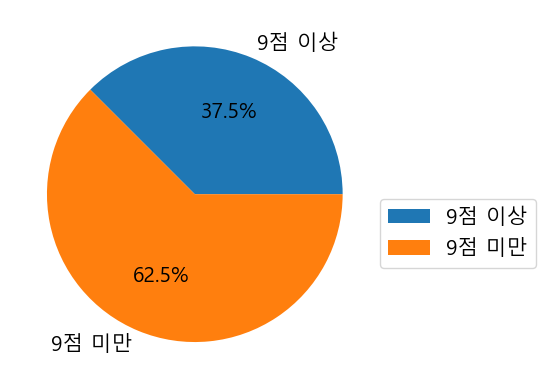

In [36]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15

data = {
'영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
'개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
'관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
'평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}

plt.bar(data['영화'], data['평점'])
plt.title('국내 Top 8 영화 평점 정보')
plt.xlabel('영화')
plt.ylabel('평점')
plt.xticks(rotation = 90)
plt.show()


import numpy as np
plt.plot(np.arange(len(data['평점'])), data['평점'], marker='o')
plt.xticks(np.arange(len(data['평점'])), data['개봉 연도'])
plt.ylim(7, 10)
plt.show()


over_9 = list(filter(lambda x:x>=9, data['평점']))
under_9 = list(filter(lambda x:x<9, data['평점']))
values = [len(over_9), len(under_9)]
label = ['9점 이상', '9점 미만']
plt.pie(values, labels=label, autopct='%.1f%%')
plt.legend(loc=(1, 0.3))
plt.show()